<a href="https://colab.research.google.com/github/sidyr6002/Zee-Recommender-System/blob/main/Zee_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Downloding the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
movies = pd.read_fwf('/content/drive/MyDrive/Scalar Projects/Zee Recommendations System/zee-movies.dat',encoding='ISO-8859-1')
users = pd.read_fwf('/content/drive/MyDrive/Scalar Projects/Zee Recommendations System/zee-users.dat',encoding='ISO-8859-1')
ratings = pd.read_fwf('/content/drive/MyDrive/Scalar Projects/Zee Recommendations System/zee-ratings.dat',encoding='ISO-8859-1')

In [ ]:
movies.head(10)

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN
5,6::Heat (1995)::Action|Crime|Thriller,NaN,NaN
6,7::Sabrina (1995)::Comedy|Romance,NaN,NaN
7,8::Tom and Huck (1995)::Adventure|Children's,NaN,NaN
8,9::Sudden Death (1995)::Action,NaN,NaN
9,10::GoldenEye (1995)::Action|Adventure|Thriller,NaN,NaN


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Movie ID::Title::Genres  3883 non-null   object
 1   Unnamed: 1               100 non-null    object
 2   Unnamed: 2               51 non-null     object
dtypes: object(3)
memory usage: 91.1+ KB


In [ ]:
users.head(10)

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455
5,6::F::50::9::55117
6,7::M::35::1::06810
7,8::M::25::12::11413
8,9::M::25::17::61614
9,10::F::35::1::95370


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   UserID::Gender::Age::Occupation::Zip-code  6040 non-null   object
dtypes: object(1)
memory usage: 47.3+ KB


In [ ]:
ratings.head(10)

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291
5,1::1197::3::978302268
6,1::1287::5::978302039
7,1::2804::5::978300719
8,1::594::4::978302268
9,1::919::4::978301368


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 1 columns):
 #   Column                              Non-Null Count    Dtype 
---  ------                              --------------    ----- 
 0   UserID::MovieID::Rating::Timestamp  1000209 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


* Users data include information about User Id, Gender, Age, Occupation and Zip
Code
* Movies data include information about Movie Id, Title and Genre
* Ratings data include information about User Id, Movie Id, Rating and Timestamp
* Datasets require data cleaning and structuring




# Data Cleaning and Feature Engineering

In [ ]:
delimiter = "::"

## Movies

In [ ]:
movies.drop(columns=['Unnamed: 1', 'Unnamed: 2'], axis=1, inplace=True)
movies = movies['Movie ID::Title::Genres'].str.split(delimiter, expand=True)

In [ ]:
movies.columns = ['MovieID', 'Title', 'Genres']
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Extracting Movie Title and Release Year
movies['Movie_Title'] = movies['Title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
movies['Release_Year'] = movies['Title'].str.extract(r'\((\d{4})\)')

# Splitting Genres
movies['Genre'] = movies['Genres'].str.split('|')

In [ ]:
movies_df = movies.drop(columns=['Title', 'Genres']).explode('Genre')
movies_df

,MovieID,Movie_Title,Release_Year,Genre
0,1,Toy Story,1995,Animation
0,1,Toy Story,1995,Children's
0,1,Toy Story,1995,Comedy
1,2,Jumanji,1995,Adventure
1,2,Jumanji,1995,Children's
...,...,...,...,...
3879,3949,Requiem for a Dream,2000,Drama
3880,3950,Tigerland,2000,Drama
3881,3951,Two Family House,2000,Drama
3882,3952,"Contender, The",2000,Drama


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6366 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MovieID       6366 non-null   object
 1   Movie_Title   6366 non-null   object
 2   Release_Year  6347 non-null   object
 3   Genre         6341 non-null   object
dtypes: object(4)
memory usage: 506.7+ KB


In [ ]:
def analyze_columns(df):
    for col in df.columns:
        print(f"Column: {col}")
        print("-" * 50)

        print(f"Unique Values:")
        print(df[col].unique())
        print("-" * 50)

        print("Value Counts (Normalized in %):")
        print((df[col].value_counts(normalize=True) * 100).round(2))

        print("=" * 50)
        print("\n")

In [ ]:
analyze_columns(movies_df)

Column: MovieID
--------------------------------------------------
Unique Values:
['1' '2' '3' ... '3950' '3951' '3952']
--------------------------------------------------
Value Counts (Normalized in %):
MovieID
673     0.08
1566    0.08
610     0.08
2322    0.08
2080    0.08
        ... 
2386    0.02
820     0.02
821     0.02
2383    0.02
2010    0.02
Name: proportion, Length: 3883, dtype: float64


Column: Movie_Title
--------------------------------------------------
Unique Values:
['Toy Story' 'Jumanji' 'Grumpier Old Men' ... 'Tigerland'
 'Two Family House' 'Contender, The']
--------------------------------------------------
Value Counts (Normalized in %):
Movie_Title
Mummy, The                                         0.11
Jungle Book, The                                   0.11
King Kong                                          0.09
Mighty Joe Young                                   0.09
That Darn Cat!                                     0.09
                                       

In [ ]:
# Filling the null values with unknown

movies_df['Genre'].fillna('Unknown', inplace=True)
movies_df['Genre'].replace('', 'Unknown', inplace=True)

In [ ]:
# Mapping each wrong/truncated genre to the correct name and replace them with the correct name

genre_mapping = {
    'A': 'Action',
    'Acti': 'Action',
    'Action': 'Action',
    'Adv': 'Adventure',
    'Advent': 'Adventure',
    'Adventu': 'Adventure',
    'Adventur': 'Adventure',
    'Adventure': 'Adventure',
    'Animati': 'Animation',
    'Animation': 'Animation',
    'Chi': "Children's",
    'Chil': "Children's",
    'Childr': "Children's",
    'Childre': "Children's",
    'Children': "Children's",
    "Children'": "Children's",
    "Children's": "Children's",
    'Com': 'Comedy',
    'Come': 'Comedy',
    'Comed': 'Comedy',
    'Comedy': 'Comedy',
    'Crime': 'Crime',
    'D': 'Documentary',
    'Docu': 'Documentary',
    'Documen': 'Documentary',
    'Document': 'Documentary',
    'Documenta': 'Documentary',
    'Documentary': 'Documentary',
    'Dr': 'Drama',
    'Dram': 'Drama',
    'Drama': 'Drama',
    'F': 'Fantasy',
    'Fant': 'Fantasy',
    'Fantas': 'Fantasy',
    'Fantasy': 'Fantasy',
    'Film-Noir': 'Film-Noir',
    'Horr': 'Horror',
    'Horro': 'Horror',
    'Horror': 'Horror',
    'Music': 'Musical',
    'Musical': 'Musical',
    'Mystery': 'Mystery',
    'R': 'Romance',
    'Ro': 'Romance',
    'Rom': 'Romance',
    'Roma': 'Romance',
    'Roman': 'Romance',
    'Romance': 'Romance',
    'S': 'Sci-Fi',
    'Sci': 'Sci-Fi',
    'Sci-': 'Sci-Fi',
    'Sci-F': 'Sci-Fi',
    'Sci-Fi': 'Sci-Fi',
    'Th': 'Thriller',
    'Thri': 'Thriller',
    'Thrille': 'Thriller',
    'Thriller': 'Thriller',
    'Unknown': 'Unknown',
    'Wa': 'War',
    'War': 'War',
    'We': 'Western',
    'Wester': 'Western',
    'Western': 'Western'
}

movies_df['Genre'] = movies_df['Genre'].replace(genre_mapping)

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6366 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MovieID       6366 non-null   object
 1   Movie_Title   6366 non-null   object
 2   Release_Year  6347 non-null   object
 3   Genre         6366 non-null   object
dtypes: object(4)
memory usage: 506.7+ KB


In [ ]:
print("Movie Genre's Value counts:")
print((movies_df['Genre'].value_counts(normalize=True) * 100).round(2))

Movie Genre's Value counts:
Genre
Drama          24.85
Comedy         18.68
Action          7.90
Thriller        7.67
Romance         7.26
Horror          5.34
Adventure       4.43
Sci-Fi          4.16
Children's      3.91
Crime           3.30
War             2.18
Documentary     1.99
Musical         1.78
Mystery         1.65
Animation       1.63
Western         1.07
Fantasy         0.99
Film-Noir       0.69
Unknown         0.52
Name: proportion, dtype: float64


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6366 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MovieID       6366 non-null   object
 1   Movie_Title   6366 non-null   object
 2   Release_Year  6347 non-null   object
 3   Genre         6366 non-null   object
dtypes: object(4)
memory usage: 506.7+ KB


In [ ]:
genre_dummies = pd.get_dummies(movies_df['Genre'], dtype=int)

In [ ]:
movies_with_genres = pd.concat(
    [movies_df[['MovieID', 'Movie_Title', 'Release_Year']], genre_dummies],
    axis=1
)

In [ ]:
movies_grouped = movies_with_genres.groupby(
    ['MovieID', 'Movie_Title', 'Release_Year'],
    as_index=False
).max()

In [ ]:
movies_grouped.head(10)

,MovieID,Movie_Title,Release_Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,Unknown,War,Western
0,1,Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,GoldenEye,1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,100,City Hall,1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1000,Curdled,1996,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1001,"Associate, The (L'Associe)",1982,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1002,Ed's Next Move,1996,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1003,Extreme Measures,1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1004,"Glimmer Man, The",1996,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1005,D3: The Mighty Ducks,1996,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1006,"Chamber, The",1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ratings

In [ ]:
ratings_df = ratings['UserID::MovieID::Rating::Timestamp'].str.split(delimiter, expand=True)
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  object
 1   MovieID    1000209 non-null  object
 2   Rating     1000209 non-null  object
 3   Timestamp  1000209 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB


In [ ]:
ratings_df['Rating'] = ratings_df['Rating'].astype(int)
ratings_df['Timestamp'] = pd.to_datetime(ratings_df['Timestamp'], unit='s')

In [ ]:
ratings_df['Year'] = ratings_df['Timestamp'].dt.year
ratings_df['Month'] = ratings_df['Timestamp'].dt.month
ratings_df['Day_Of_Week'] = ratings_df['Timestamp'].dt.day_name()
ratings_df['Hour'] = ratings_df['Timestamp'].dt.hour

In [ ]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp,Year,Month,Day_Of_Week,Hour
0,1,1193,5,2000-12-31 22:12:40,2000,12,Sunday,22
1,1,661,3,2000-12-31 22:35:09,2000,12,Sunday,22
2,1,914,3,2000-12-31 22:32:48,2000,12,Sunday,22
3,1,3408,4,2000-12-31 22:04:35,2000,12,Sunday,22
4,1,2355,5,2001-01-06 23:38:11,2001,1,Saturday,23


### User Stats

In [ ]:
user_stats = ratings_df.groupby('UserID')['Rating'].agg(['mean', 'count']).reset_index()
user_stats.rename(columns={'mean': 'User_Avg_Rating', 'count': 'Total_User_Ratings'}, inplace=True)

In [ ]:
user_stats.head(10)

,UserID,User_Avg_Rating,Total_User_Ratings
0,1,4.188679,53
1,10,4.114713,401
2,100,3.026316,76
3,1000,4.130952,84
4,1001,3.652520,377
5,1002,4.136364,66
6,1003,4.137931,29
7,1004,3.160083,481
8,1005,4.141304,92
9,1006,3.068182,44


### Movie Stats

In [ ]:
movie_stats = ratings_df.groupby('MovieID')['Rating'].agg(['mean', 'count']).reset_index()
movie_stats.rename(columns={'mean': 'Movie_Avg_Rating', 'count': 'Total_Movie_Ratings'}, inplace=True)

In [ ]:
movie_stats.head(10)

,MovieID,Movie_Avg_Rating,Total_Movie_Ratings
0,1,4.146846,2077
1,10,3.540541,888
2,100,3.062500,128
3,1000,3.050000,20
4,1002,4.250000,8
5,1003,2.942149,121
6,1004,2.663366,101
7,1005,2.373239,142
8,1006,3.089744,78
9,1007,2.978448,232


## User

In [ ]:
users_df = users['UserID::Gender::Age::Occupation::Zip-code'].str.split(delimiter, expand=True)
users_df.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   object
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   object
 3   Occupation  6040 non-null   object
 4   Zip-code    6040 non-null   object
dtypes: object(5)
memory usage: 236.1+ KB


In [ ]:
analyze_columns(users_df)

Column: UserID
--------------------------------------------------
Unique Values:
['1' '2' '3' ... '6038' '6039' '6040']
--------------------------------------------------
Value Counts (Normalized in %):
UserID
1       0.02
4024    0.02
4033    0.02
4032    0.02
4031    0.02
        ... 
2012    0.02
2011    0.02
2010    0.02
2009    0.02
6040    0.02
Name: proportion, Length: 6040, dtype: float64


Column: Gender
--------------------------------------------------
Unique Values:
['F' 'M']
--------------------------------------------------
Value Counts (Normalized in %):
Gender
M    71.71
F    28.29
Name: proportion, dtype: float64


Column: Age
--------------------------------------------------
Unique Values:
['1' '56' '25' '45' '50' '35' '18']
--------------------------------------------------
Value Counts (Normalized in %):
Age
25    34.70
35    19.75
18    18.26
45     9.11
50     8.21
56     6.29
1      3.68
Name: proportion, dtype: float64


Column: Occupation
---------------------

In [ ]:
age_mapping = {
    '1': 'Under 18',
    '18': '18-24',
    '25': '25-34',
    '35': '35-44',
    '45': '45-49',
    '50': '50-55',
    '56': '56 Above'
}

users_df['Age'] = users_df['Age'].replace(age_mapping)

In [ ]:
occupation_mapping = {
    '0': "other",
    '1': "academic/educator",
    '2': "artist",
    '3': "clerical/admin",
    '4': "college/grad student",
    '5': "customer service",
    '6': "doctor/health care",
    '7': "executive/managerial",
    '8': "farmer",
    '9': "homemaker",
    '10': "k-12 student",
    '11': "lawyer",
    '12': "programmer",
    '13': "retired",
    '14': "sales/marketing",
    '15': "scientist",
    '16': "self-employed",
    '17': "technician/engineer",
    '18': "tradesman/craftsman",
    '19': "unemployed",
    '20': "writer"
}

users_df['Occupation'] = users_df['Occupation'].replace(occupation_mapping)

In [ ]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,k-12 student,48067
1,2,M,56 Above,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


## Merging the DataFrames

In [ ]:
ratings_movies = pd.merge(ratings_df, movies_grouped, on='MovieID', how='inner')
merged_df = pd.merge(ratings_movies, users_df, on='UserID', how='inner')

In [ ]:
merged_df

,UserID,MovieID,Rating,Timestamp,Year,Month,Day_Of_Week,Hour,Movie_Title,Release_Year,...,Romance,Sci-Fi,Thriller,Unknown,War,Western,Gender,Age,Occupation,Zip-code
0,1,1193,5,2000-12-31 22:12:40,2000,12,Sunday,22,One Flew Over the Cuckoo's Nest,1975,...,0,0,0,0,0,0,F,Under 18,k-12 student,48067
1,1,661,3,2000-12-31 22:35:09,2000,12,Sunday,22,James and the Giant Peach,1996,...,0,0,0,0,0,0,F,Under 18,k-12 student,48067
2,1,914,3,2000-12-31 22:32:48,2000,12,Sunday,22,My Fair Lady,1964,...,1,0,0,0,0,0,F,Under 18,k-12 student,48067
3,1,3408,4,2000-12-31 22:04:35,2000,12,Sunday,22,Erin Brockovich,2000,...,0,0,0,0,0,0,F,Under 18,k-12 student,48067
4,1,2355,5,2001-01-06 23:38:11,2001,1,Saturday,23,"Bug's Life, A",1998,...,0,0,0,0,0,0,F,Under 18,k-12 student,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996660,6040,1091,1,2000-04-26 02:35:41,2000,4,Wednesday,2,Weekend at Bernie's,1989,...,0,0,0,0,0,0,M,25-34,doctor/health care,11106
996661,6040,1094,5,2000-04-25 23:21:27,2000,4,Tuesday,23,"Crying Game, The",1992,...,1,0,0,0,1,0,M,25-34,doctor/health care,11106
996662,6040,562,5,2000-04-25 23:19:06,2000,4,Tuesday,23,Welcome to the Dollhouse,1995,...,0,0,0,0,0,0,M,25-34,doctor/health care,11106
996663,6040,1096,4,2000-04-26 02:20:48,2000,4,Wednesday,2,Sophie's Choice,1982,...,0,0,0,0,0,0,M,25-34,doctor/health care,11106


# Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Genre Count

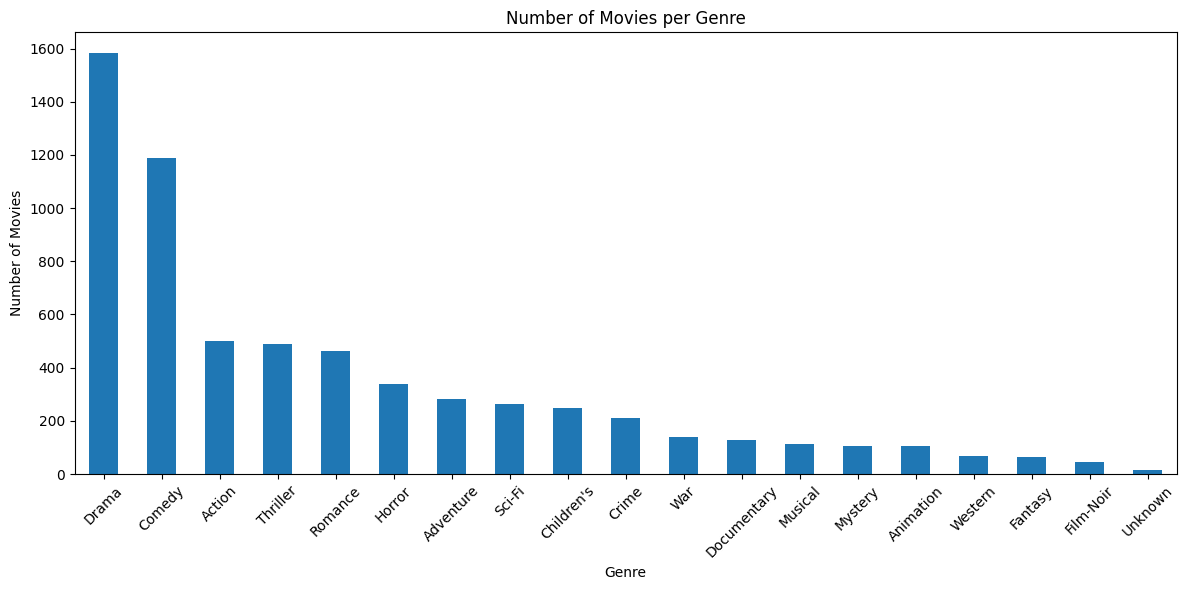

In [ ]:
genre_counts = movies_grouped.iloc[:, 3:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

genre_counts.plot(kind='bar')

plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* Most of the movies are from Drama, followed by Comedy and Action



### Releases Per Year

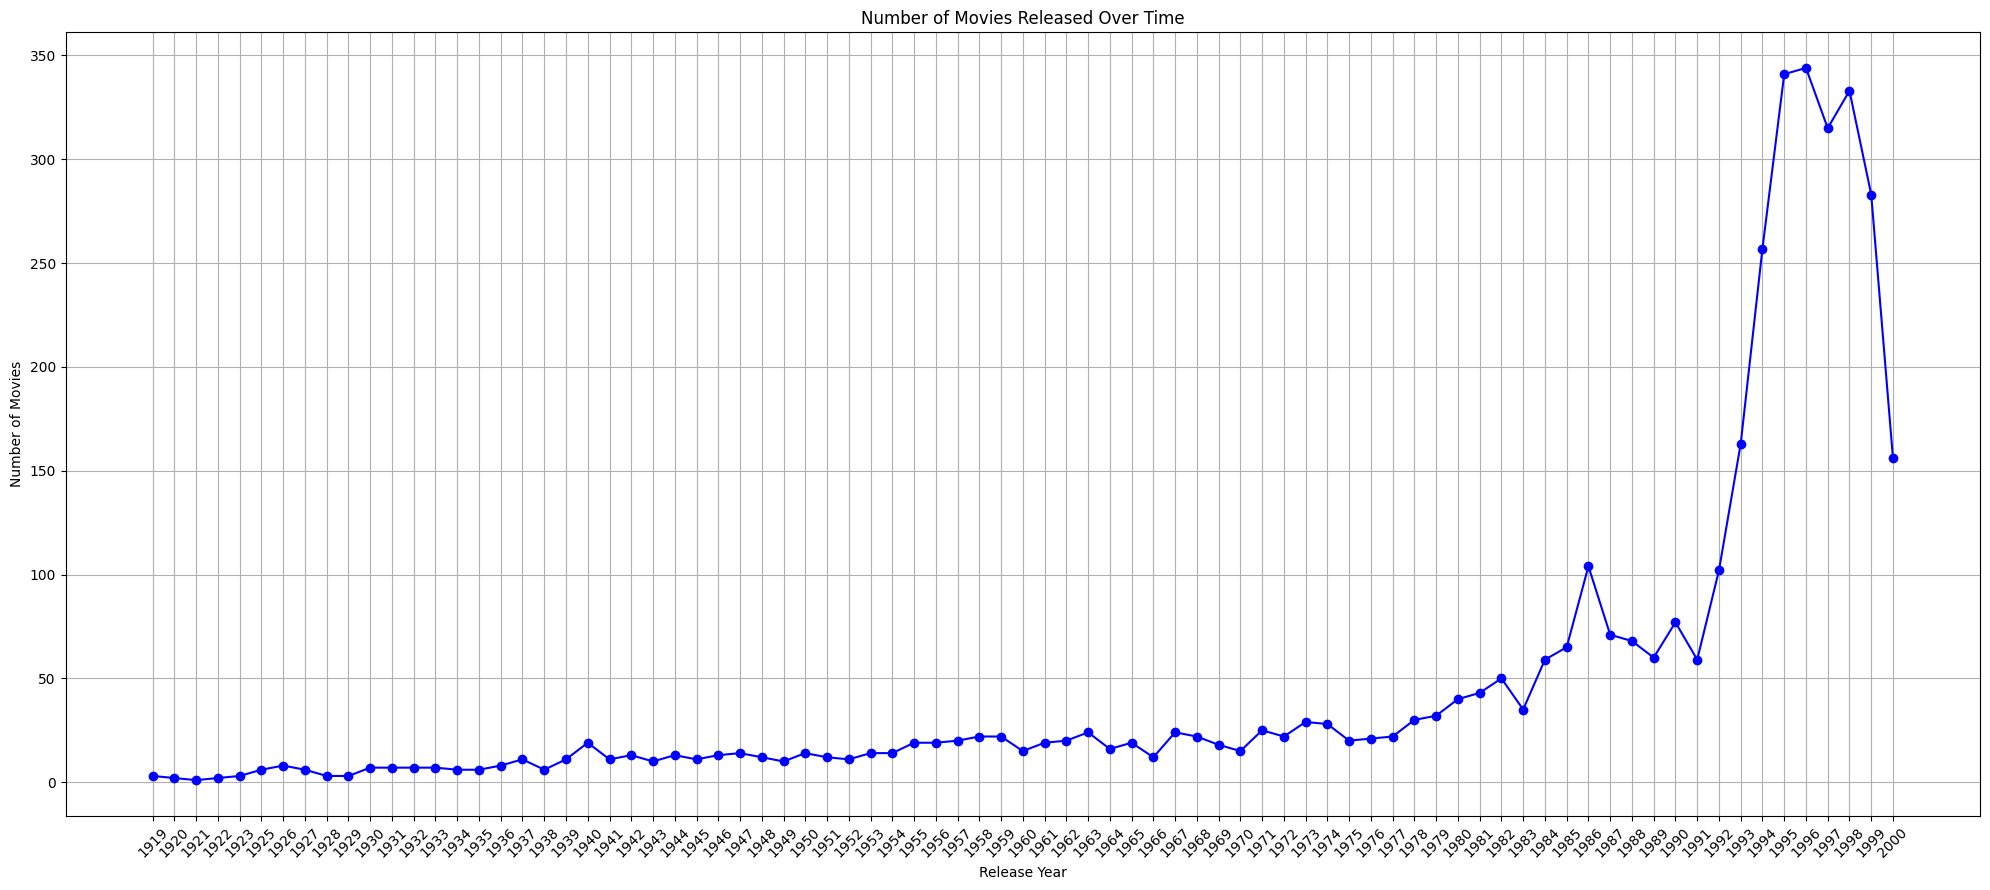

In [ ]:
year_counts = movies_grouped['Release_Year'].value_counts().sort_index()

plt.figure(figsize=(20, 9))
plt.plot(year_counts.index, year_counts.values, marker='o', color='b')
plt.title('Number of Movies Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Maximum movies got released between 1994 and 2000


### Rating Distribution

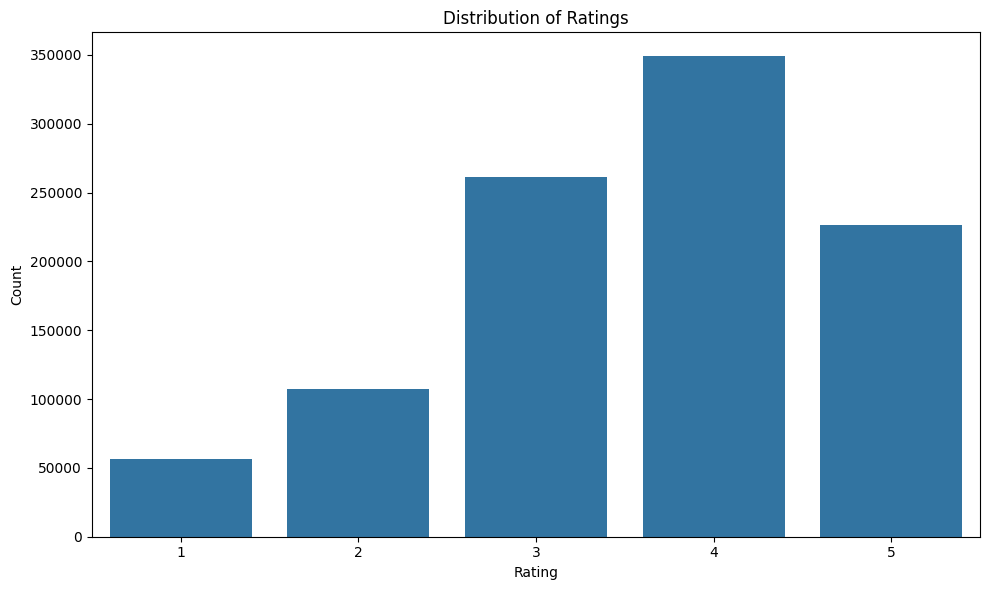

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(data=ratings_df, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Maximum Ratings given by users is 4 followed 3 and 5

### Most Rated Movies

In [ ]:
movie_stats_with_title = movie_stats.merge(movies[['MovieID', 'Movie_Title']], on='MovieID', how='inner')
top20 = movie_stats_with_title.sort_values(by='Total_Movie_Ratings', ascending=False).head(20)

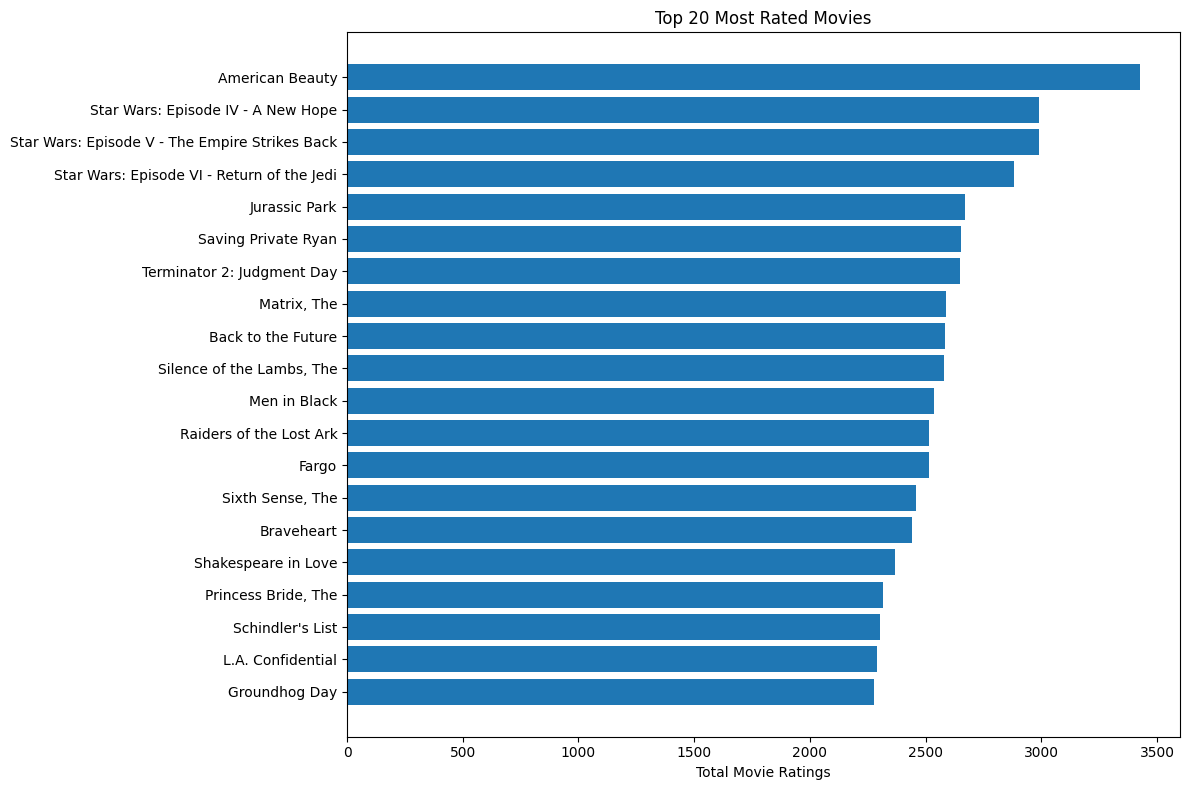

In [ ]:
plt.figure(figsize=(12, 8))

plt.barh(top20['Movie_Title'], top20['Total_Movie_Ratings'])
plt.xlabel('Total Movie Ratings')
plt.title('Top 20 Most Rated Movies')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

American Beauty is the most Rated Movie followed by Star wars 4, 5 and 6

### Most Rating by an User

In [ ]:
top20_users = user_stats.sort_values(by='Total_User_Ratings', ascending=False).head(20)

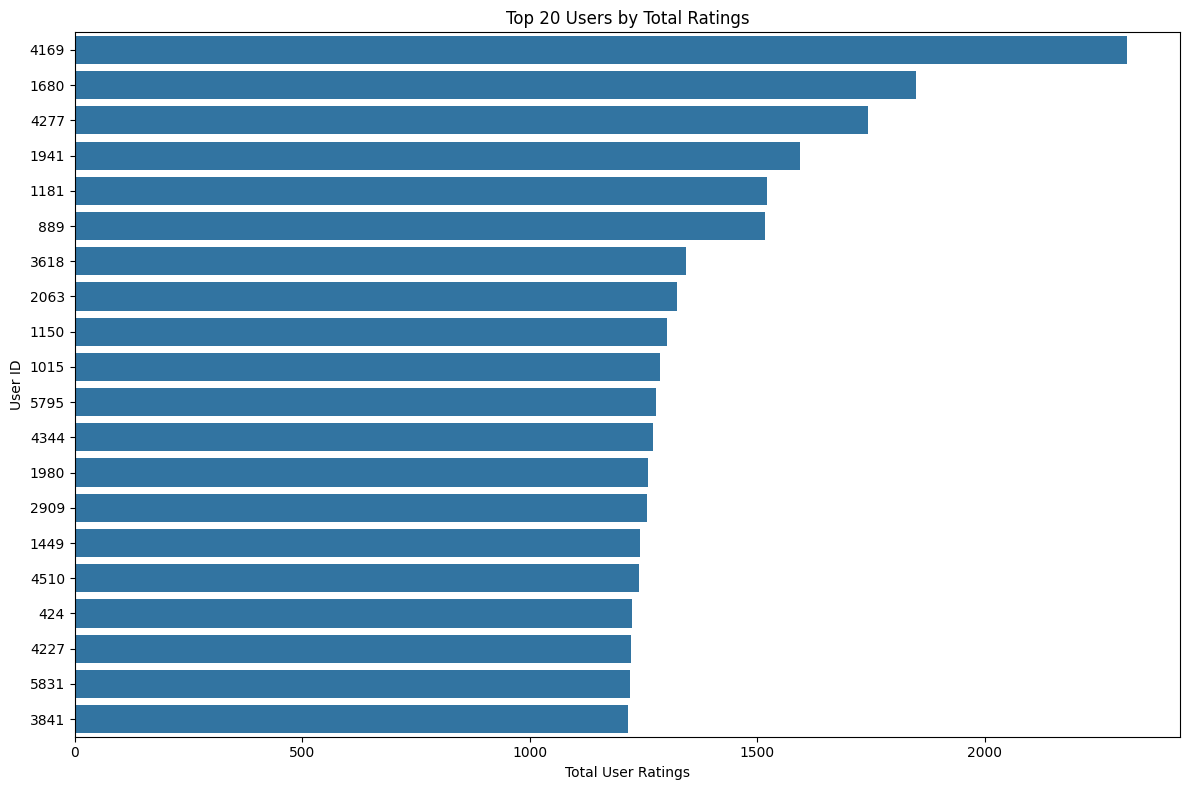

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(data=top20_users, x='Total_User_Ratings', y='UserID')
plt.title("Top 20 Users by Total Ratings")
plt.xlabel("Total User Ratings")
plt.ylabel("User ID")

plt.tight_layout()
plt.show()

### Rating Count Per Year

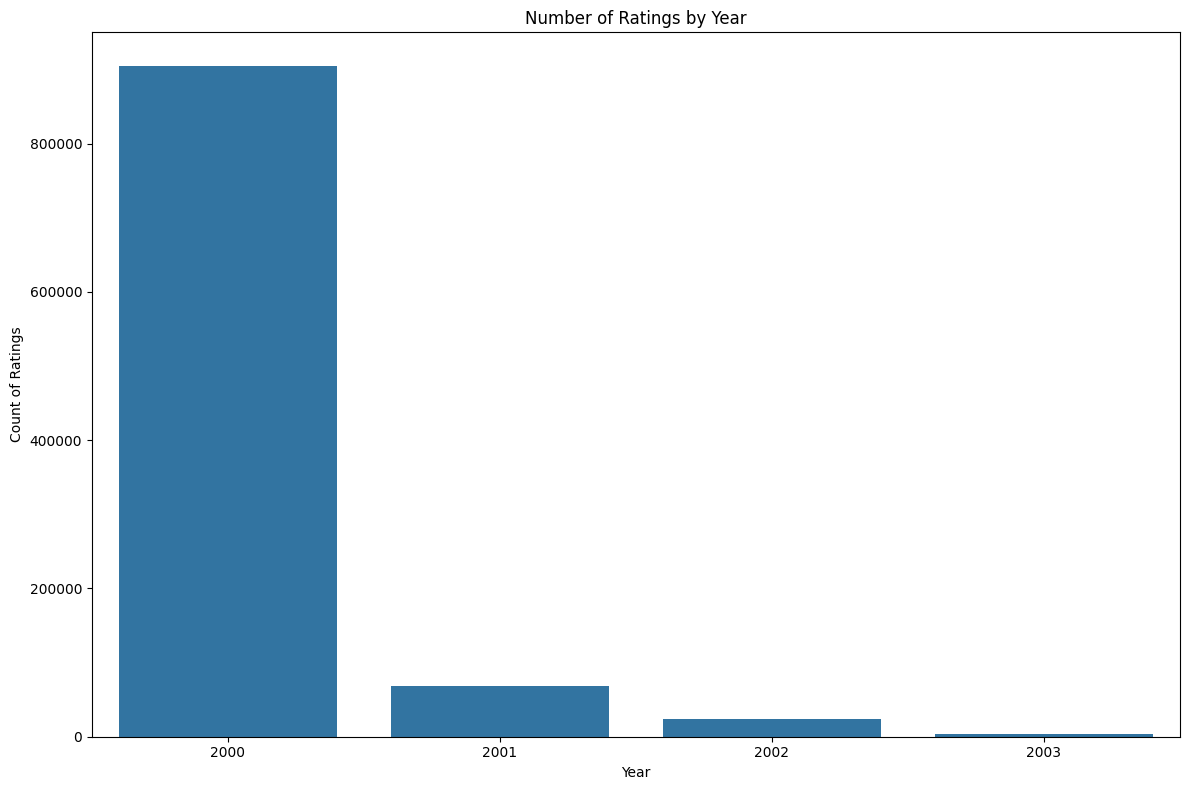

In [ ]:
plt.figure(figsize=(12, 8))

year_counts = ratings_df['Year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("Number of Ratings by Year")
plt.xlabel("Year")
plt.ylabel("Count of Ratings")

plt.tight_layout()
plt.show()

* 2000 is the year users have rated the movies the most

### Rating Count by Month

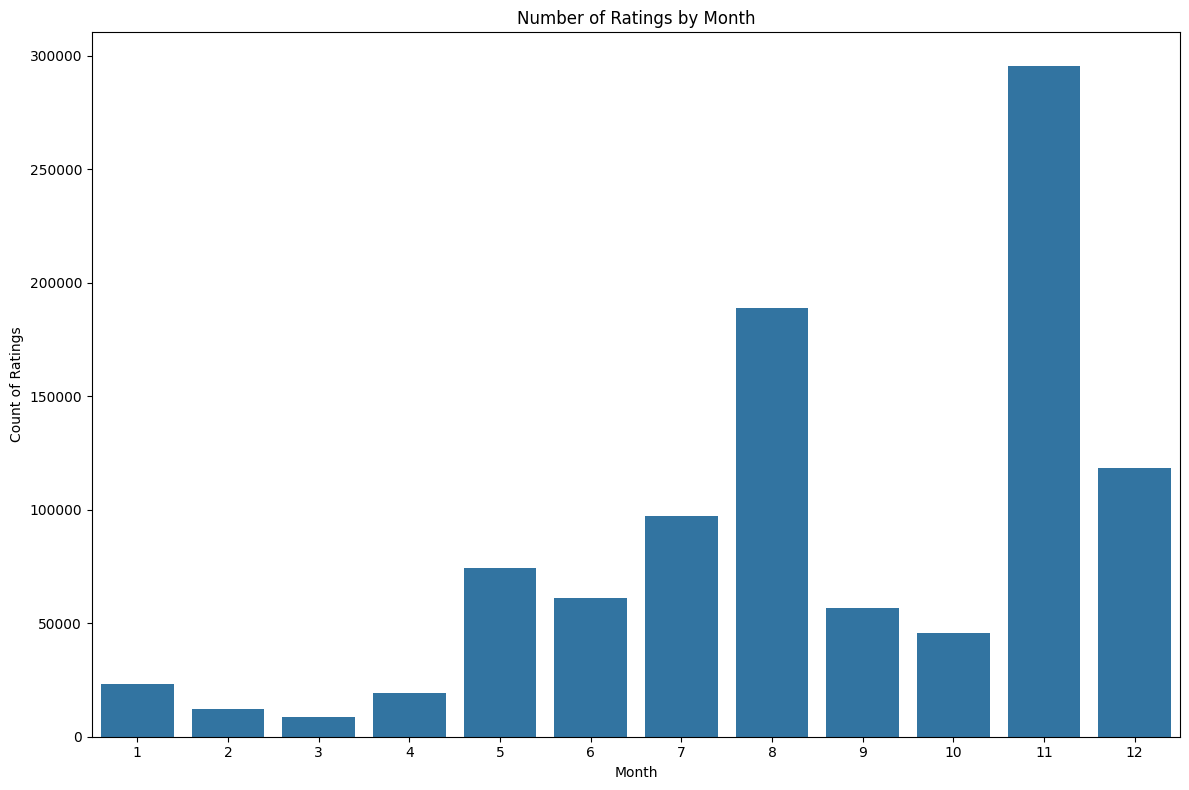

In [ ]:
plt.figure(figsize=(12, 8))

month_counts = ratings_df['Month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title("Number of Ratings by Month")
plt.xlabel("Month")
plt.ylabel("Count of Ratings")

plt.tight_layout()
plt.show()

Users rated the movies the most in November followed by August and December

### Users Rating Habits

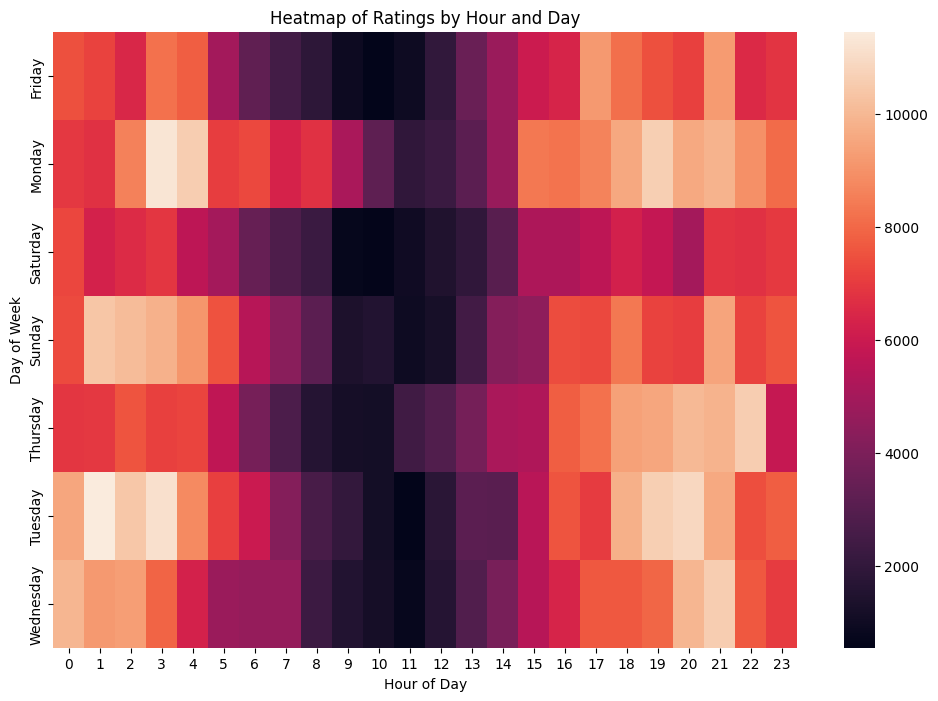

In [ ]:
plt.figure(figsize=(12, 8))

heatmap_data = ratings_df.groupby(['Day_Of_Week', 'Hour'])['Rating'].count().unstack()
sns.heatmap(heatmap_data, annot=False)

plt.title('Heatmap of Ratings by Hour and Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

* Most of ratings are done in the evening or late in the night. From 6PM to 3AM
* The ratings are very less during the 6AM to 5PM

### Gender Distribution

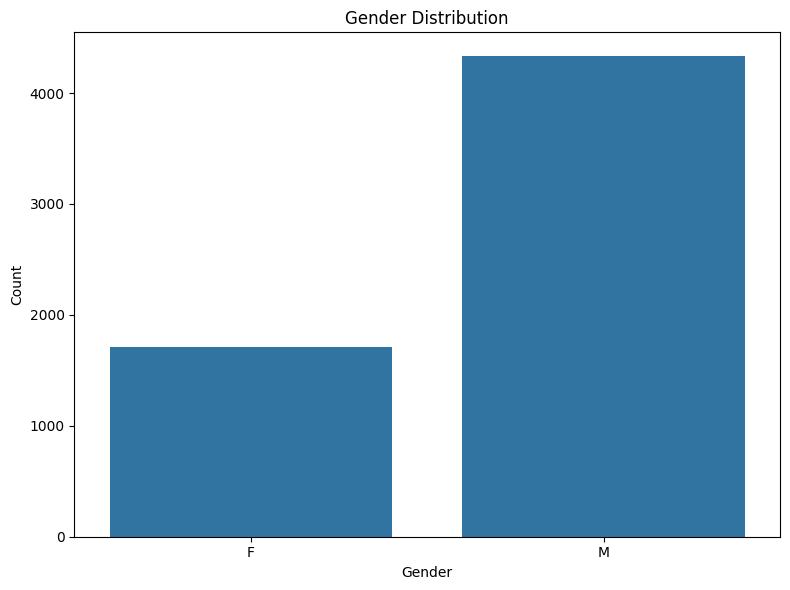

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(x='Gender', data=users_df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Age Distribution

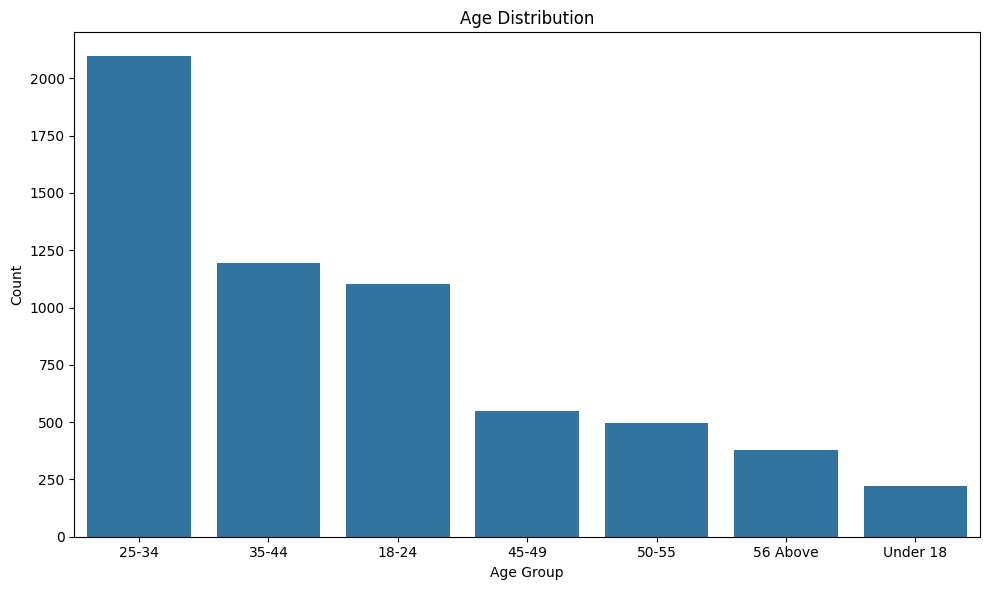

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='Age', data=users_df, order=users_df['Age'].value_counts().index)
plt.title("Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Occupation Distribution

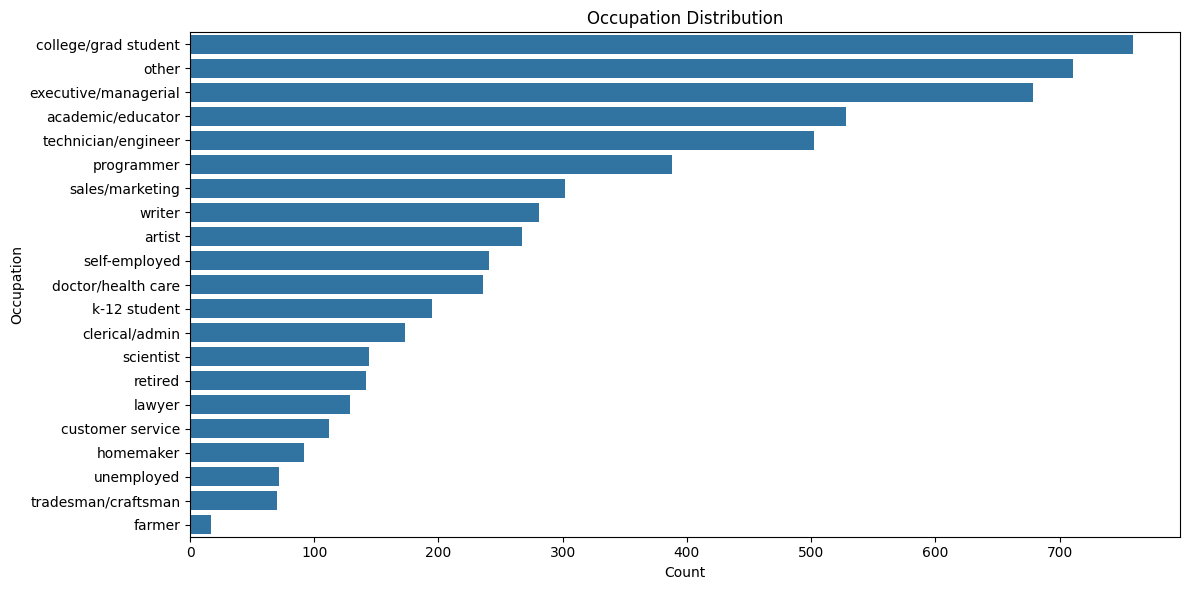

In [ ]:
plt.figure(figsize=(12,6))

sns.countplot(y='Occupation', data=users_df, order=users_df['Occupation'].value_counts().index)
plt.title("Occupation Distribution")
plt.xlabel("Count")
plt.ylabel("Occupation")

plt.tight_layout()
plt.show()

### Gender Distribution by Age Group

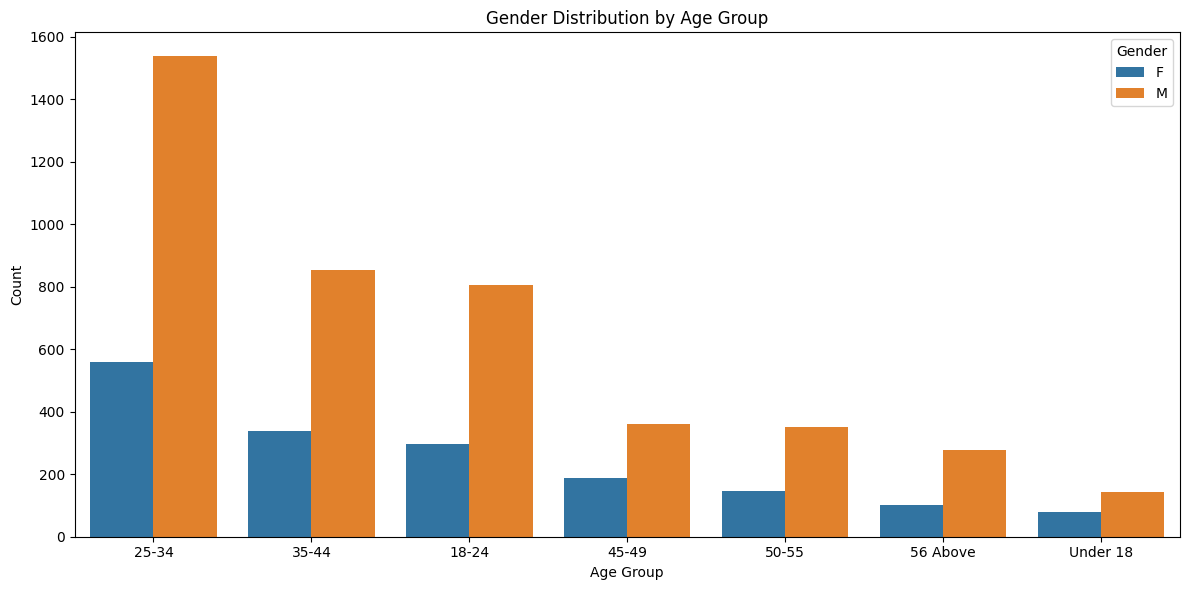

In [ ]:
plt.figure(figsize=(12,6))

sns.countplot(x='Age', data=users_df, hue='Gender',order=users_df['Age'].value_counts().index)
plt.title("Gender Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Gender")

plt.tight_layout()
plt.show()

### Occupation Distribution by Gender

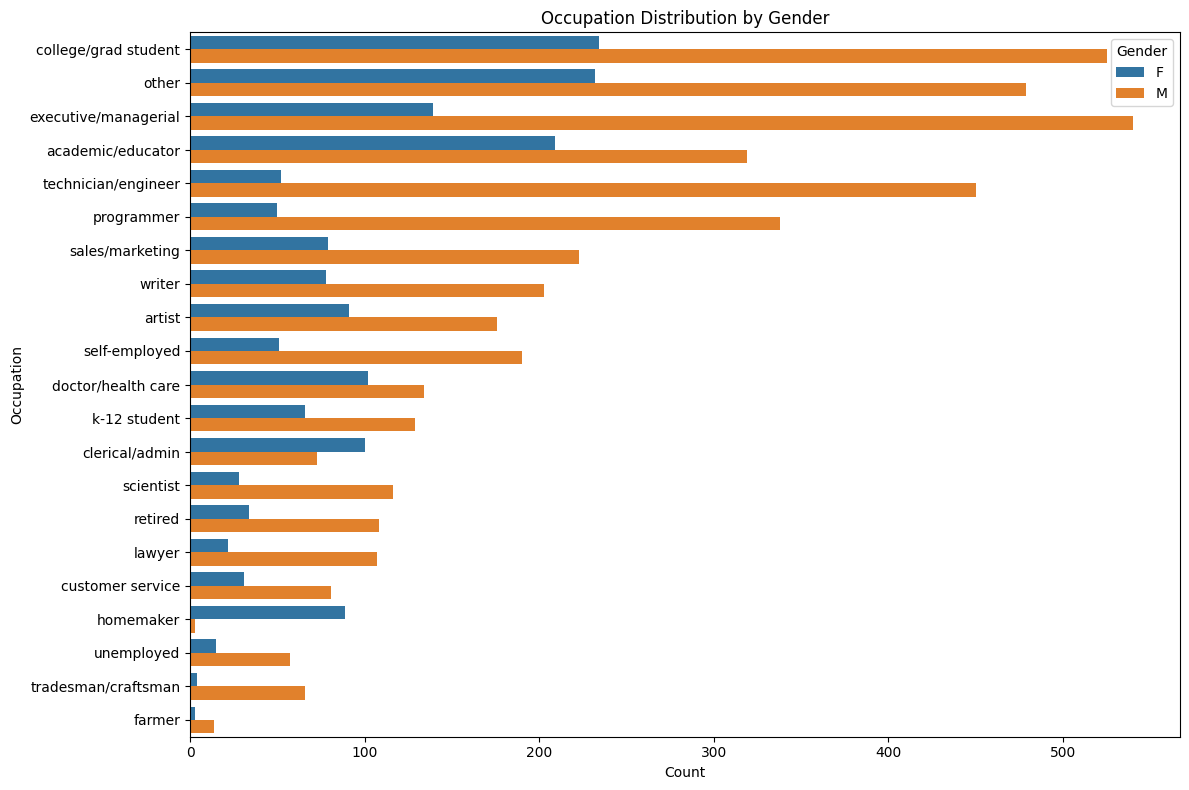

In [ ]:
plt.figure(figsize=(12,8))

sns.countplot(y='Occupation', data=users_df, hue='Gender', order=users_df['Occupation'].value_counts().index)
plt.title("Occupation Distribution by Gender")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.legend(title="Gender")

plt.tight_layout()
plt.show()

### Top 10 Zip Codes

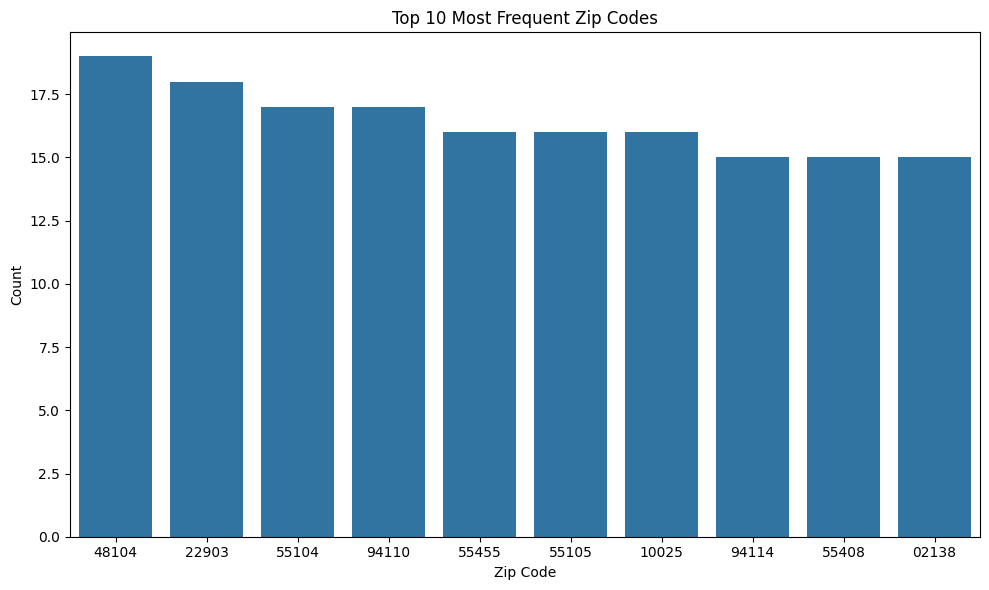

In [ ]:
top10_zip = users_df['Zip-code'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10_zip.index, y=top10_zip.values)
plt.title("Top 10 Most Frequent Zip Codes")
plt.xlabel("Zip Code")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Collaborative Filtering with Pearson Correlation

In [ ]:
ratings_df_with_titles = ratings_df.merge(movies_df[['MovieID', 'Movie_Title']], on='MovieID', how='left')

In [ ]:
movie_user_pivot = ratings_df_with_titles.pivot_table(index='Movie_Title', columns='UserID', values='Rating')
movie_user_pivot_filled = movie_user_pivot.fillna(0)

In [ ]:
movie_user_pivot_filled

UserID,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
Movie_Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Night Mother,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The",0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero Effect,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero Kelvin (Kjærlighetens kjøtere),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sparcity

In [ ]:
total_entries = movie_user_pivot_filled.size
zero_entries = (movie_user_pivot_filled == 0).sum().sum()
sparsity = zero_entries / total_entries

print("Total entries:", total_entries)
print("Zero (missing) entries:", zero_entries)
print()
print("Sparsity:", sparsity)
print("Density (non-missing percentage):", 1 - sparsity)

Total entries: 22130560
Zero (missing) entries: 21133475

Sparsity: 0.9549453335116689
Density (non-missing percentage): 0.04505466648833112


In [ ]:
min_movie_ratings = 100
min_user_ratings = 50

In [ ]:
filtered_pivot = movie_user_pivot_filled[ movie_user_pivot_filled.astype(bool).sum(axis=1) >= min_movie_ratings]
filtered_pivot = filtered_pivot.loc[ :, filtered_pivot.astype(bool).sum(axis=0) >= min_user_ratings ]

In [ ]:
total_entries = filtered_pivot.size
zero_entries = (filtered_pivot == 0).sum().sum()
new_sparsity = zero_entries / total_entries

print("Total entries(New Pivot):", total_entries)
print()
print("New Sparsity:", new_sparsity)

Total entries(New Pivot): 8374586

New Sparsity: 0.8947815450220464


## Correlation Matrix

In [ ]:
normalized_matrix = filtered_pivot.sub(filtered_pivot.mean(axis=1), axis=0)
correlation_matrix = normalized_matrix.T.corr(method='pearson')

In [ ]:
correlation_matrix

Movie_Title,"'burbs, The",...And Justice for All,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",2 Days in the Valley,20 Dates,"20,000 Leagues Under the Sea",200 Cigarettes,...,Yellow Submarine,Yojimbo,You've Got Mail,Young Frankenstein,Young Guns,Young Guns II,Young Sherlock Holmes,Your Friends and Neighbors,Zero Effect,eXistenZ
Movie_Title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The",1.000000,0.093009,0.120459,0.186411,0.094732,0.126721,0.129467,0.008748,0.110379,0.206428,...,0.082612,-0.002790,0.146005,0.139914,0.241970,0.183000,0.156934,0.110988,0.111851,0.051497
...And Justice for All,0.093009,1.000000,0.006542,0.117046,0.150084,0.053576,0.159394,0.011468,0.106052,0.068957,...,0.108163,0.019942,0.032410,0.113049,0.062526,0.041257,0.110147,0.087262,0.068794,0.066292
10 Things I Hate About You,0.120459,0.006542,1.000000,0.103129,0.035338,0.150805,0.080557,0.093864,-0.003628,0.153591,...,0.039042,-0.028339,0.195170,0.005890,0.084886,0.092114,0.050298,0.029933,0.104294,0.079119
101 Dalmatians,0.186411,0.117046,0.103129,1.000000,0.123896,0.071569,0.111043,-0.005380,0.214165,0.134952,...,0.235758,0.037482,0.196824,0.169077,0.151237,0.094661,0.135921,0.073528,0.073432,0.022047
12 Angry Men,0.094732,0.150084,0.035338,0.123896,1.000000,0.019765,0.071465,0.035740,0.134069,0.022360,...,0.118045,0.069229,0.040542,0.158178,0.061800,0.013364,0.075843,0.074381,0.054195,0.005281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II,0.183000,0.041257,0.092114,0.094661,0.013364,0.173507,0.101531,0.006779,0.063294,0.111658,...,0.037434,0.002572,0.096580,0.047725,0.581593,1.000000,0.135725,0.044171,0.079928,0.048623
Young Sherlock Holmes,0.156934,0.110147,0.050298,0.135921,0.075843,0.125494,0.083064,0.015789,0.201508,0.057784,...,0.166605,0.069958,0.084226,0.212447,0.273863,0.135725,1.000000,0.053839,0.107452,0.115783
Your Friends and Neighbors,0.110988,0.087262,0.029933,0.073528,0.074381,0.003543,0.149971,0.065853,-0.015013,0.088647,...,0.100408,0.057868,0.054122,0.087100,0.067543,0.044171,0.053839,1.000000,0.180027,0.119460


## Recommendation

In [ ]:
def get_recommendations(item_title, correlation_matrix, top_n=5):
    """
    Return top N recommended items for a given item using the correlation matrix.

    Parameters:
        item_title (str): The movie title for which to get recommendations.
        correlation_matrix (pd.DataFrame): DataFrame containing Pearson correlation
                                           values between movies.
        top_n (int): The number of top recommendations to return (default is 5).

    Returns:
        pd.Series: A Series with the top recommended movie titles and their
                   correlation values.
    """
    if item_title not in correlation_matrix.columns:
        print(f"Item '{item_title}' not found in the correlation matrix.")
        return None

    item_corr = correlation_matrix[item_title]
    item_corr = item_corr.drop(item_title)
    recommendations = item_corr.sort_values(ascending=False).head(top_n)

    return recommendations

In [ ]:
movie_title = "Toy Story"
recommended_movies = get_recommendations(movie_title, correlation_matrix, top_n=5)
print(f"Top 5 recommendations for '{movie_title}':")
print(recommended_movies)

Top 5 recommendations for 'Toy Story':
Movie_Title
Toy Story 2             0.462240
Aladdin                 0.434571
Bug's Life, A           0.391837
Lion King, The          0.373512
Beauty and the Beast    0.361427
Name: Toy Story, dtype: float64


# Cosine Similarity

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
movie_user_csr = csr_matrix(filtered_pivot.values)

In [ ]:
cosine_sim_movies = cosine_similarity(movie_user_csr)
similarity_matrix_movies = pd.DataFrame(cosine_sim_movies, index=filtered_pivot.index, columns=filtered_pivot.index)

In [ ]:
user_movie_csr = csr_matrix(filtered_pivot.T.values)

In [ ]:
cosine_sim_users = cosine_similarity(user_movie_csr)
similarity_matrix_users = pd.DataFrame(cosine_sim_users, index=filtered_pivot.columns, columns=filtered_pivot.columns)

In [ ]:
print("Item Similarity Matrix Shape:", similarity_matrix_movies.shape)
print("User Similarity Matrix Shape:", similarity_matrix_users.shape)

Item Similarity Matrix Shape: (1993, 1993)
User Similarity Matrix Shape: (4202, 4202)


## KNN Recommendation

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(movie_user_csr)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def get_recommendations(movie_title, model, data, n_recommendations=5):
    """
    Given a movie title, return top n_recommendations similar movies based on cosine similarity.

    Parameters:
        movie_title (str): The movie title to find recommendations for.
        model (NearestNeighbors): A fitted NearestNeighbors model.
        data (csr_matrix): The movie-user matrix in CSR format.
        n_recommendations (int): Number of recommendations to return.

    Returns:
        list: A list of tuples (recommended_movie_title, distance).
    """
    # Check if movie exists in our pivot table
    if movie_title not in filtered_pivot.index:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return None

    # Get the index of the movie in the pivot table
    movie_index = filtered_pivot.index.get_loc(movie_title)

    # Query for nearest neighbors; n_neighbors includes the movie itself.
    distances, indices = model.kneighbors(data[movie_index], n_neighbors=n_recommendations+1)

    # Build list of recommendations (skip the first one as it's the movie itself with distance 0)
    recommendations = []
    for i in range(1, len(distances[0])):
        rec_movie = filtered_pivot.index[indices[0][i]]
        rec_distance = distances[0][i]
        recommendations.append((rec_movie, rec_distance))

    return recommendations

In [ ]:
movie_title = "Toy Story"
recommended_movies = get_recommendations(movie_title, model_knn, movie_user_csr, n_recommendations=5)

In [ ]:
print(f"Top 5 recommendations for '{movie_title}':")
for rec, dist in recommended_movies:
    print(f"    {rec} (Cosine distance: {dist:.4f})")

Top 5 recommendations for 'Toy Story':
    Toy Story 2 (Cosine distance: 0.3433)
    Groundhog Day (Cosine distance: 0.3647)
    Aladdin (Cosine distance: 0.3723)
    Bug's Life, A (Cosine distance: 0.3789)
    Back to the Future (Cosine distance: 0.3897)


In [ ]:
movie_title = "Liar Liar"
recommended_movies = get_recommendations(movie_title, model_knn, movie_user_csr, n_recommendations=5)

In [ ]:
print(f"Top 5 recommendations for '{movie_title}':")
for rec, dist in recommended_movies:
    print(f"    {rec} (Cosine distance: {dist:.4f})")

Top 5 recommendations for 'Liar Liar':
    Mrs. Doubtfire (Cosine distance: 0.4290)
    Ace Ventura: Pet Detective (Cosine distance: 0.4653)
    Dumb & Dumber (Cosine distance: 0.4760)
    Home Alone (Cosine distance: 0.4795)
    Wayne's World (Cosine distance: 0.4867)


# SVD

In [ ]:
! pip install surprise
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['UserID', 'MovieID', 'Rating']], reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

## Matrix Factorization

In [ ]:
def train_evaluate_svd(n_factors):
    """
    Train an SVD model with n_factors latent dimensions, then evaluate
    its performance using RMSE and MAPE on the test set.
    """
    print(f"Training SVD with n_factors = {n_factors}")
    model = SVD(n_factors=n_factors, random_state=42)
    model.fit(trainset)

    predictions = model.test(testset)

    rmse = accuracy.rmse(predictions, verbose=False)

    actuals = np.array([pred.r_ui for pred in predictions])
    preds   = np.array([pred.est for pred in predictions])
    mape = np.mean(np.abs((actuals - preds) / actuals)) * 100

    print(f"RMSE: {rmse:.4f} | MAPE: {mape:.2f}%\n")
    return model, predictions, rmse, mape

In [ ]:
model_d4, predictions_d4, rmse_d4, mape_d4 = train_evaluate_svd(n_factors=4)

Training SVD with n_factors = 4
RMSE: 0.8830 | MAPE: 26.95%



In [ ]:
# Extract latent embeddings for movies from model_d4
movie_embeddings = model_d4.qi

# To relate the embeddings back to MovieIDs, we use the trainset's mapping
movie_inner_ids = list(trainset.all_items())
movie_raw_ids = [trainset.to_raw_iid(inner_id) for inner_id in movie_inner_ids]

# Create a DataFrame for the item embeddings, indexing by MovieID
movie_emb_df = pd.DataFrame(movie_embeddings, index=movie_raw_ids)

In [ ]:
pca = PCA(n_components=2)
movie_emb_pca = pca.fit_transform(movie_emb_df.values)

### PCA

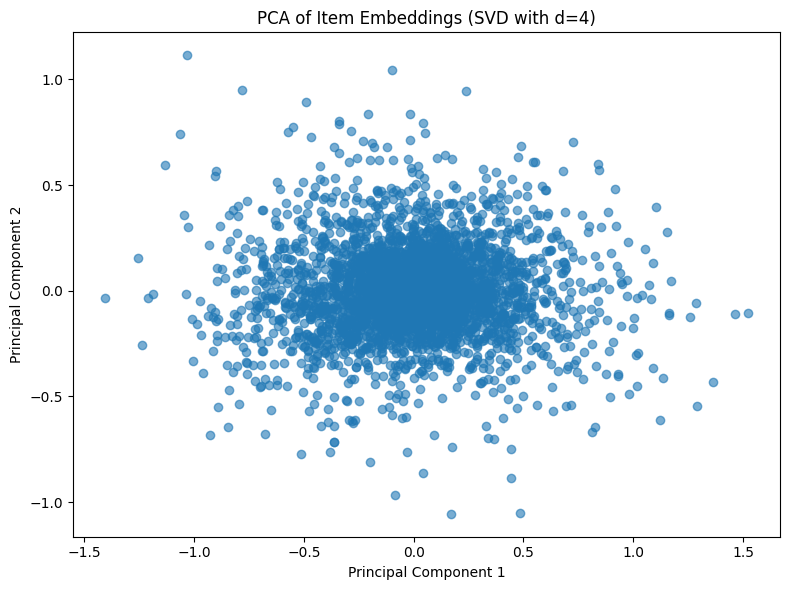

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(movie_emb_pca[:, 0], movie_emb_pca[:, 1], alpha=0.6)
plt.title("PCA of Item Embeddings (SVD with d=4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

### TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
movie_emb_tsne = tsne.fit_transform(movie_emb_df.values)

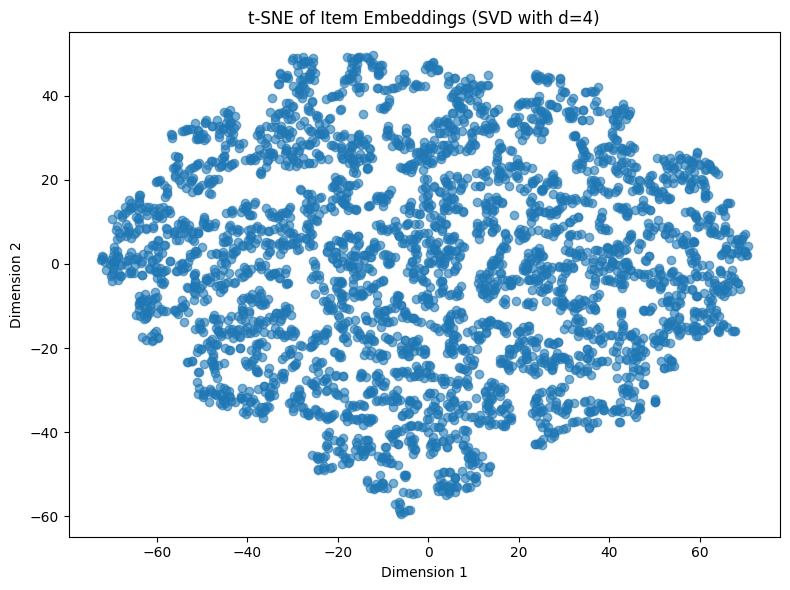

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(movie_emb_tsne[:, 0], movie_emb_tsne[:, 1], alpha=0.6)
plt.title("t-SNE of Item Embeddings (SVD with d=4)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.tight_layout()
plt.show()

In [ ]:
similarities = cosine_similarity(movie_embeddings)

In [ ]:
movie_index = 2

similarities[movie_index, movie_index] = -np.inf
similar_movies = similarities[movie_index].argsort()[-5:][::-1]
print(f"Movies similar to {movies_df.iloc[movie_index]['Movie_Title']}:")
for idx in similar_movies:
    print(movies_df.iloc[idx]['Movie_Title'])

Movies similar to Toy Story:
Desperado
Arsenic and Old Lace
City Hall
Ruby in Paradise
Natural Born Killers


# Insights

* Highest number of movies nearly 1600 belong to Drama followed by Comedy and then Action
* Release Year has got the range from 1919 to 2000
* Maximum movies got released in 1996 and 1995
* Number of Movies in Action, Comedy, Drama Genre have increased over years.
* Percentage of Western and Animation movies have relatively remained same over the years
* Crime and Thriller based movies have shown sharp increase around 1995
* Maximum Ratings given by users is 4 followed 3 and 5
* Maximum number of Ratings were given in the year 2000 which sharply decreased in 2001 and further reducing till 2003
* MovieID 2858 is the most rated followed by 260 and 1196
* Most of the ratings are given during evening or late night hours.
* Less ratings are given during 0600 hrs to 1700 hrs of the day
* Males are dominating Users distribution with 72% and Females at 28%
* More than 2000 users belong to age group 25-34 followed by 35-44 and 18-24 with approx. 1100-1200 users
* Maximum users belong to 'college/grad student' category followed by 'other' and 'executive/managerial'
* Among the top 10 zip-codes in terms of users count, four zip codes start with 55.
* Most of the users belong to zip-code 48104 followed by 22903 and 55104
* Maximum users (almost 400 numbers) are Male, 18-24 age group, college/grad students.
* Followed by Male, 25-34 age group who are in occupations like technician/engineer, other, executive/managerial
* Sparsity of the user-item matrix: 95.53%
* RMSE of the svd model is found to be 0.8813 and MAPE is 27.18%

# Business Recommendations


#### Enhancing User Engagement & Satisfaction  
- **Personalized Recommendations**: Tailor suggestions based on user preferences, demographics, and historical ratings.  
- **Diverse Suggestions**: Balance popular movies with niche, highly-rated films for discovery.  
- **Timing Insights**: Send notifications during peak engagement hours (evenings, late nights).  

#### Increasing User Retention & Platform Usage  
- **Dynamic User Profiles**: Continuously update based on recent interactions.  
- **Rewarding Engagement**: Introduce gamification (badges, rewards) to boost activity.  
- **Community Features**: Enable watchlists, social sharing, and discussions.  

#### Accuracy & Patterns in User Preferences  
- **Rating Trends**: Most ratings fall between 3-4; refine recommendations for mid-range raters.  
- **Demographic Insights**: Personalize based on user segments (e.g., males 18-24).  
- **Genre Preferences**: Highlight trending genres (Action, Comedy, Drama) while promoting underrepresented ones.  

#### Comparison of Model Performance  
- **Pearson Correlation**: Captures linear relationships but struggles with sparsity (95.53%).  
- **Cosine Similarity**: Works well with sparse data but ignores magnitude differences.  
- **SVD (Matrix Factorization)**: Best predictive performance (RMSE: 0.8813, MAPE: 27.18%) but requires fine-tuning.  

#### Strategies for Refinement  
- **Implicit Feedback**: Use browsing time, clicks, and watch completions.  
- **Hybrid Models**: Combine collaborative and content-based filtering for accuracy.  
- **Hyperparameter Tuning**: Optimize latent factors and regularization.  

#### Monitoring & Updating the System  
- **Periodic Retraining**: Adapt to changing preferences with fresh data.  
- **User Feedback Loop**: Collect explicit feedback to refine recommendations.  
- **Performance Metrics**: Track RMSE, MAPE, and user satisfaction scores.  

#### Areas for Further Research  
- **Temporal Dynamics**: Adapt to changing user preferences over time.  
- **Cross-Domain Recommendations**: Leverage insights from TV shows, books, and music.  
- **Demographic Diversity**: Improve inclusivity by analyzing trends in underrepresented groups.  

#### Scalability & Adaptability  
- **Scalability**: Use distributed computing for large-scale user and content growth.  
- **Content Adaptability**: Expand recommendations to music, games, and other media.  
- **User Segments**: Address cold-start issues for new users and customize for frequent raters.

# Questionnaire

1. Users of which age group have watched and rated the most number of movies?

    Ans: More than 2000 users belong to age group 25-34 who have watched and rated most number of movies

2. Users belonging to which profession have watched and rated the most movies?

    Ans: From above EDA and plot the answer is 'College/grad students'

3. Most of the users in our dataset who’ve rated the movies are Male (T/F)?

    Ans: True, 72% are Males

4. Most of the movies present in our dataset were released in which decade? 70s b. 90s c. 50s d.80s

    Ans: From the time series plot above, maximum movies got released in the year 1995 and 1996 , so the answer is 90s

5. The movie with maximum no. of ratings is ___.
    
    Ans: American Beauty

6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

    Ans: Mrs. Doubtfire, Ace Ventura: Pet Detectiv and Dumb & Dumber

7. On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.

    Ans: On the basis of approach, Collaborative Filtering methods can be classified into user-based and item-based.

8. Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.

    Ans: Pearson Correlation ranges between -1 to +1.

    -1 indicates a perfect negative linear relationship.
    +1 indicates a perfect positive linear relationship.
    0 indicates no linear relationship.
    Cosine Similarity belongs to the interval between 0 to 1 (if dealing with non-negative vectors).

    0 indicates no similarity.
    1 indicates complete similarity (vectors are identical).
    
9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

    Ans: RMSE is found to be 0.8813 and MAPE is 27.18%

10. Give the sparse ‘row’ matrix representation for the following dense matrix-[[1 0] [3 7]]

    Ans: (row_ptr, col_indices, values)=([0,1,3],[0,0,1],[1,3,7])